In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import time
XCr_path = os.getcwd()+'/../'
sys.path.append(XCr_path)
from XCrystal import *
t0 = time.time()

In [2]:
omega= 17450.0
xcr = XCrystal(XCr_path+'/config/Si220_17p45keVDislk60degGronkowski.yaml')
pp=xcr.configure(0,0)
pp

In [3]:

def single_realization_with_data(delta_theta,Rock_angle):
    
    xcr = XCrystal(XCr_path+'/config/Si220_17p45keVDislk60degGronkowski.yaml',omega)
    xcr.configure(delta_theta,Rock_angle)
    xcr.run3D()
    return xcr.Reflectivity, xcr.Transmission, xcr.U1_field, xcr.U2_field, xcr.u, xcr.M

In [4]:
omega0=17450

In [5]:
U1_data = []
U2_data = []

Rs, Ts, U1_xyz, U2_xyz, up, MM = single_realization_with_data(0e-6,omega0)
U1_data.append(U1_xyz)
U2_data.append(U2_xyz)

U1_xyz = np.asarray(U1_data)
U2_xyz = np.asarray(U2_data)

Beam propagation progress: 100%|██████████| 500/500 [00:42<00:00, 11.90it/s]


Photon energy (omega):  17450.0 ; Reflectivity:  0.16213271505672025 ; Transmission:  0.39149684426602654


In [6]:
 U2_xyz.shape

(1, 250, 150, 501)

558.4140227032628

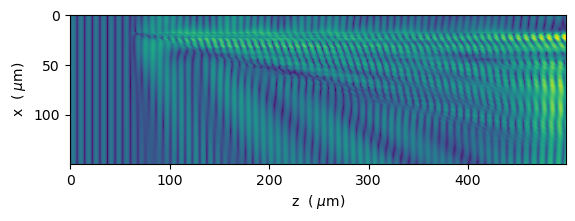

In [7]:
p=1
plt.imshow(np.abs(U1_xyz[0,50,:,0:xcr.M-1]*1 + U2_xyz[0,50,:,0:xcr.M-1]*1)**0.5*(1))
#plt.imshow(np.abs(U1_xyz[0,:,0,:])**2 + np.abs(U2_xyz[0,:,0,:])**2,extent=[0,xcr.M*xcr.Z/xcr.convr*1e6,0,xcr.xx.max()*2/xcr.convr*1e6], aspect='auto',cmap='jet')
#plt.ylim(350, 800)
#plt.xlim(0,300)
plt.ylabel(r'x  ( $\mu$m)')
plt.xlabel(r'z  ( $\mu$m)')
xcr.M*xcr.Z/xcr.convr*1e6

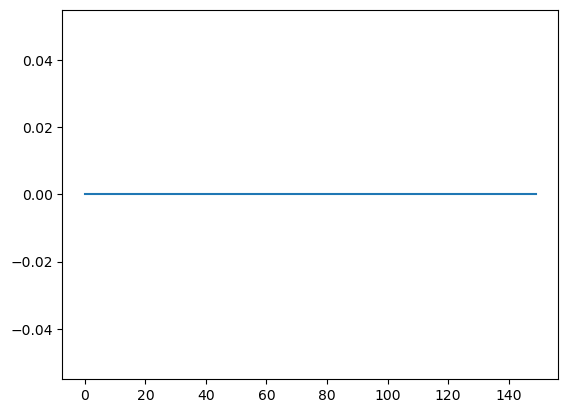

In [8]:
plt.plot(np.abs(U1_xyz[0,2,:,9]*1 + U2_xyz[0,2,:,9]*0)**0.5*(1))

## 

Text(0.5, 0, 'z  ( $\\mu$m)')

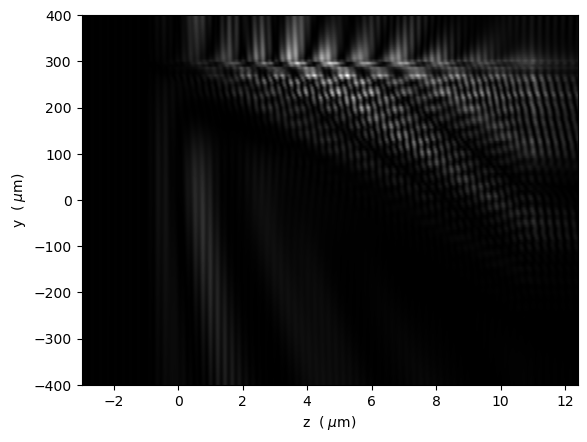

In [9]:
p=35
iIndx=1
wM=xcr.M-1
plt.imshow(np.abs(U1_xyz[0,iIndx,:,0:wM]*1 + U2_xyz[0,iIndx,:,0:wM]*1)**2*xcr.u[iIndx,:,0:wM]**0,extent=[-3,xcr.M*xcr.Z/xcr.convr*1e6/36.3-3,-xcr.yy.max()*2/xcr.convr*1e6/2,xcr.yy.max()*2/xcr.convr*1e6/2], aspect='auto',cmap='gray')
#plt.imshow(np.abs(U1_xyz[0,:,0,:])**2 + np.abs(U2_xyz[0,:,0,:])**2,extent=[0,xcr.M*xcr.Z/xcr.convr*1e6,0,xcr.xx.max()*2/xcr.convr*1e6], aspect='auto',cmap='jet')
#plt.ylim(-2.8,2.8)
#plt.xlim(0,10)
plt.ylabel(r'y  ( $\mu$m)')
plt.xlabel(r'z  ( $\mu$m)')

In [10]:
 U2_xyz.shape

(1, 250, 150, 501)

In [11]:
xcr.M

500

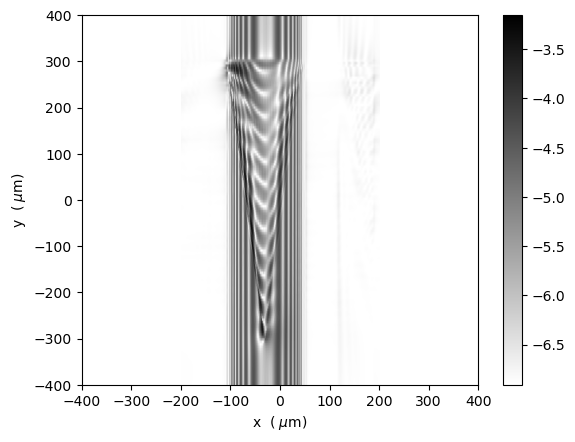

In [12]:
pp=499
ints=np.abs(U1_xyz[0,:,:,pp]*1 + U2_xyz[0,:,:,pp]*0)**(2)
ints=np.transpose(ints)
#ints=np.flipud(ints)
#ints=np.fliplr(ints)
plt.imshow(np.log(ints+0.001),extent=[-xcr.xx.max()/xcr.convr*1e6,xcr.xx.max()/xcr.convr*1e6,xcr.yy.min()/xcr.convr*1e6,xcr.yy.max()/xcr.convr*1e6], aspect='auto',cmap='gray_r')
#plt.ylim(150, 500)
plt.xlim(-400, 400)

plt.ylabel(r'y  ( $\mu$m)')
plt.xlabel(r'x  ( $\mu$m)')
plt.colorbar()

In [13]:
xcr.slit_x/xcr.convr

5.087847583827018e-06

(-400.0, 400.0)

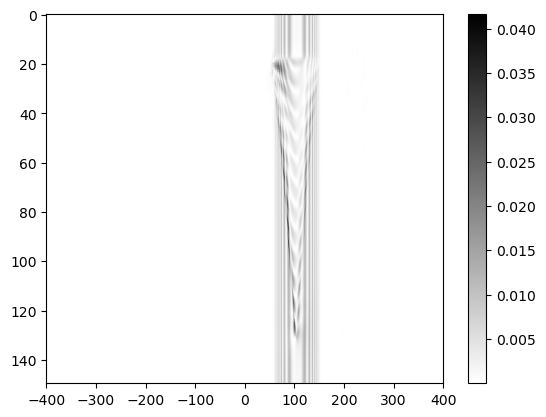

In [14]:
plt.imshow(ints, aspect='auto',cmap='gray_r')
plt.colorbar()
plt.xlim(-400, 400)

In [17]:
xcr.x0d

-20

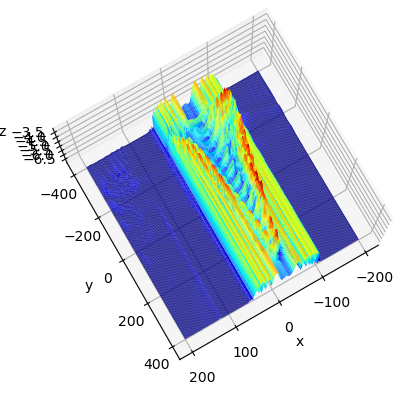

In [18]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
#Z=(1-np.exp(-5*ints))
Z=ints
Z=np.log(ints+0.001)
X, Y = np.meshgrid(xcr.xx/xcr.convr*1e6,xcr.yy/xcr.convr*1e6)
ax.plot_surface(X,Y,Z, rstride=1, cstride=1,
                cmap='jet', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
ax.view_init(80, 60)



In [19]:
np.argmax(ints)
indices = np.where(ints == ints.max())
indices, np.shape(ints)

((array([94]), array([90])), (150, 250))

x0d: 20
y0d: -0 #y coordinate of dislocatio in um
z0d: -40 #z coordinate of dislocatio in um

In [20]:
xcr.xgrid

250

In [21]:
iIndx=30
xcr.u.shape
xcr.xx[iIndx]/xcr.convr*1e6

-151.80722891566262

(250, 150, 500)

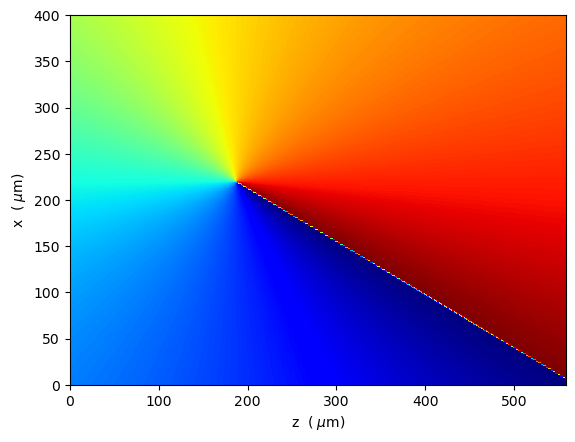

In [22]:
p=50
plt.imshow(xcr.u[:,p,0:xcr.M-1],extent=[0,xcr.M*xcr.Z/xcr.convr*1e6,0,xcr.xx.max()*2/xcr.convr*1e6], aspect='auto',cmap='jet')
#plt.imshow(np.abs(U1_xyz[0,:,0,:])**2 + np.abs(U2_xyz[0,:,0,:])**2,extent=[0,xcr.M*xcr.Z/xcr.convr*1e6,0,xcr.xx.max()*2/xcr.convr*1e6], aspect='auto',cmap='jet')
#plt.ylim(350, 800)
#plt.xlim(0,300)
plt.ylabel(r'x  ( $\mu$m)')
plt.xlabel(r'z  ( $\mu$m)')
xcr.M*xcr.Z/xcr.convr*1e6
xcr.u.shape

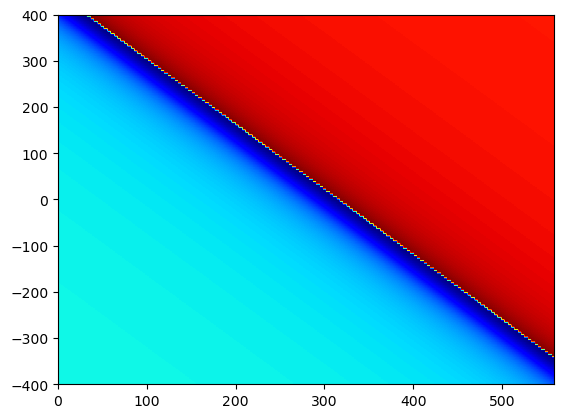

In [23]:
iIndx=125
plt.imshow(xcr.u[iIndx,:,:],extent=[0,xcr.M*xcr.Z/xcr.convr*1e6,-xcr.yy.max()/xcr.convr*1e6,xcr.yy.max()/xcr.convr*1e6], aspect='auto',cmap='jet')

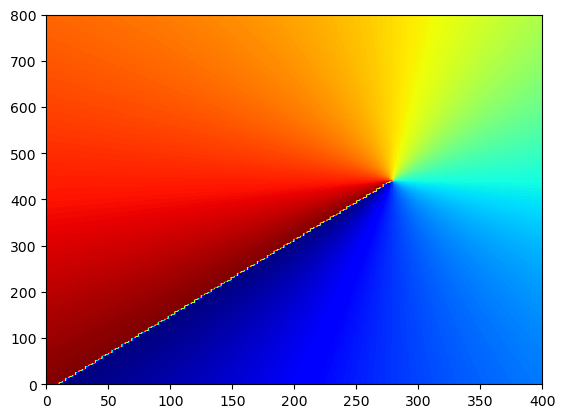

In [24]:
plt.imshow(xcr.u[:,:,350],extent=[0,xcr.xx.max()*2/xcr.convr*1e6,0,xcr.yy.max()*2/xcr.convr*1e6], aspect='auto',cmap='jet')
#plt.ylim(20, 40)
#plt.xlim(480,500)

In [25]:
t1 = time.time()  
print('Time (min):', (t1 - t0)/60)

Time (min): 1.6295349796613057


In [26]:
np.tan(np.pi/180*20)

0.3639702342662023

In [27]:
U1_xyz.shape

(1, 250, 150, 501)

'z  ( $\\mu$m)'

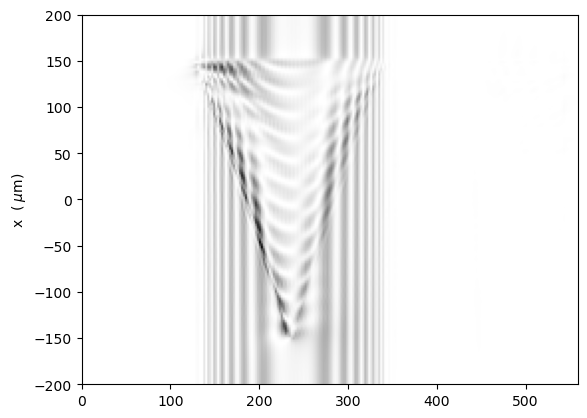

In [28]:
p=10
wM=xcr.M-1
plt.imshow(ints, extent=[0,xcr.M*xcr.Z/xcr.convr*1e6,-xcr.xx.max()/xcr.convr*1e6,xcr.xx.max()/xcr.convr*1e6],aspect='auto',cmap='gray_r')
#plt.xlim(0,100)
#plt.imshow(np.abs(U1_xyz[0,:,p,0:wM]*1 + U2_xyz[0,:,p,0:wM]*0), aspect='auto',cmap='jet')
plt.ylabel(r'x  ( $\mu$m)')
(r'z  ( $\mu$m)')
#plt.ylim(-100,100)


Text(0.5, 0, 'z  ( $\\mu$m)')

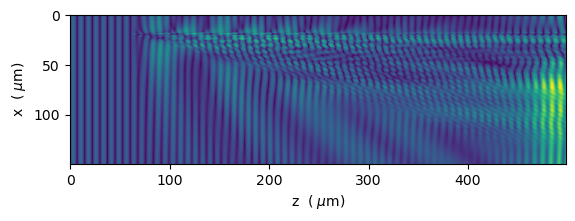

In [29]:
p=50
wM=xcr.M-1
plt.imshow(np.abs(0*U1_xyz[0,p,:,0:wM])**0.9 + 1*np.abs(U2_xyz[0,p,:,0:wM])**0.9)
#plt.xlim(177,194)
#plt.imshow(np.abs(U1_xyz[0,:,p,0:wM]*1 + U2_xyz[0,:,p,0:wM]*0), aspect='auto',cmap='jet')
plt.ylabel(r'x  ( $\mu$m)')
plt.xlabel(r'z  ( $\mu$m)')

In [30]:
1.7834097308427/np.sqrt(2)

1.2610611143129486

In [31]:
xcr.x00/np.tan(xcr.alpha)/xcr.convr*1e6

-159.34083641927256

In [32]:
min(xcr.z1[:])/xcr.convr*1e6

-159.34083641927256

In [33]:
xcr.z0/xcr.convr*1e6

159.34083641927256

In [34]:
xcr.x00/xcr.convr*1e6

-29.999999999999996

In [35]:
import sys
sys.version_info

sys.version_info(major=3, minor=9, micro=15, releaselevel='final', serial=0)

In [36]:
print(sys.version)

3.9.15 | packaged by conda-forge | (main, Nov 22 2022, 08:45:29) 
[GCC 10.4.0]
